In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

In [35]:
def is_stationary(ts):
    p_val = adfuller(ts)[1]
    return p_val <= 0.05


def is_relevant(granger_result):
    tests = "ssr_ftest", "ssr_chi2test", "lrtest", "params_ftest"
    p_val = []
    for i in tests:
        p_val.append(granger_result[3][0][i][1])
    p_val = round(sum(p_val) / len(p_val), 2)
    return p_val <= 0.05

def get_F(granger_result):
    tests = "ssr_ftest", "params_ftest"
    f_val = []
    for i in tests:
        f_val.append(granger_result[3][0][i][0])
    f_val = round(sum(f_val) / len(f_val), 2)
    return f_val

def granger_test(df, main_col, cols):
    relevant = []
    for col in cols:
        try:
            x = grangercausalitytests(df[[main_col, col]], maxlag=[3], verbose=False)
            if is_relevant(x):
                f_val = get_F(x)
                relevant.append((col, f_val))
        except:
            print("There was an issue with: ", col)
    return relevant


def check_stationarity_all():
    # check stationarity of close and if it's not stationary check diffs
    for company in ["amzn", "aapl", "tsla", "msft", "goog", "googl"]:
        df = pd.read_csv(f"../datasets/v3/binned/{company}.csv")
        if not is_stationary(df["close"]):
            print(f"{company} 'close' isn't stationary")
            print("After pct_change():", is_stationary(df["diffs"]))

In [52]:
def plot_F(f_vals, title):
    x = [i[1] for i in f_vals]
    y = [i[0] for i in f_vals]
    
    sns.barplot(x=x, y=y).set_title(title)
    plt.show()

In [4]:
check_stationarity_all()

amzn 'close' isn't stationary
After pct_change(): True
aapl 'close' isn't stationary
After pct_change(): True
tsla 'close' isn't stationary
After pct_change(): True
msft 'close' isn't stationary
After pct_change(): True
goog 'close' isn't stationary
After pct_change(): True
googl 'close' isn't stationary
After pct_change(): True


amzn: [('low', 3.18), ('vol', 9.83), ('comment_num_sum', 12.29), ('comp_mean', 9.97), ('comp_median', 4.36), ('is_negative_sum', 12.49), ('is_positive_sum', 5.85), ('like_num_sum', 11.48), ('neg_mean', 16.46), ('neg_std', 7.32), ('count', 55.39), ('pos_max', 8.01), ('pos_mean', 5.71), ('pos_std', 8.84), ('retweet_num_sum', 55.56), ('relative_count', 11.23)]


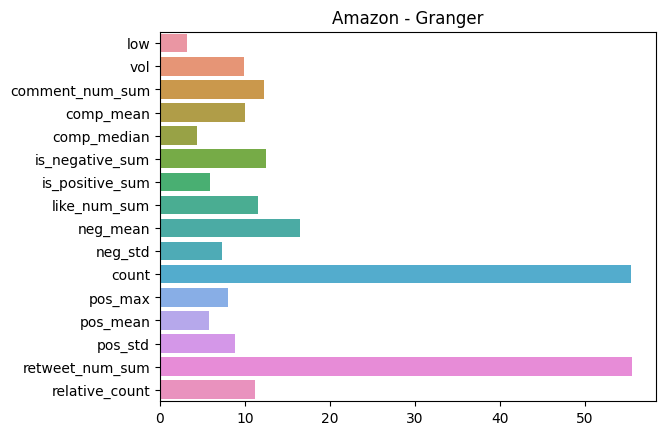

There was an issue with:  neg_min
There was an issue with:  pos_min
aapl: [('high', 4.52), ('vol', 4.04), ('comment_num_sum', 4.14), ('comp_max', 3.91), ('comp_mean', 13.88), ('comp_median', 2.65), ('is_negative_sum', 20.51), ('is_positive_sum', 6.5), ('like_num_sum', 2.78), ('neg_max', 10.92), ('neg_mean', 39.1), ('neg_std', 26.24), ('neu_mean', 4.08), ('count', 4.79), ('pos_max', 6.0), ('pos_mean', 4.94), ('pos_std', 8.77), ('retweet_num_sum', 9.02)]


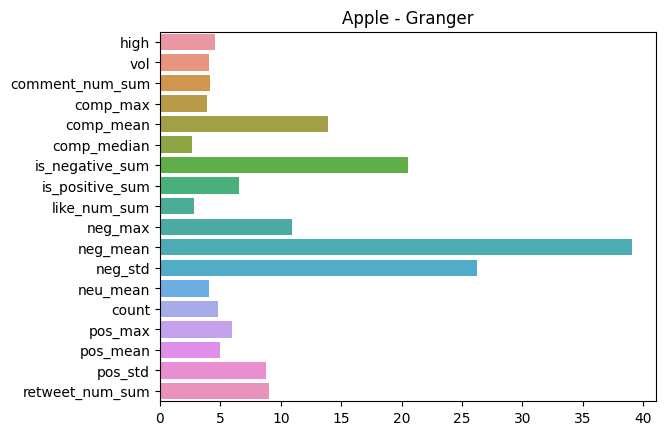

tsla: [('comp_mean', 10.43), ('is_negative_sum', 9.33), ('is_positive_sum', 4.02), ('neg_max', 3.56), ('neg_mean', 17.43), ('neg_std', 12.19), ('pos_max', 5.35), ('pos_mean', 3.96), ('pos_std', 7.76)]


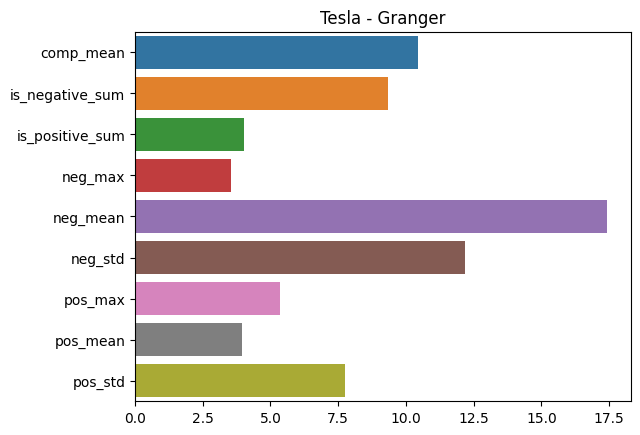

msft: [('vol', 8.72), ('comment_num_sum', 44.01), ('comp_mean', 4.6), ('is_negative_sum', 6.03), ('is_positive_sum', 4.61), ('like_num_sum', 50.14), ('neg_mean', 7.48), ('neg_median', 2.93), ('neg_min', 4.29), ('neg_std', 4.23), ('neu_min', 4.5), ('count', 71.71), ('pos_max', 14.25), ('pos_mean', 5.2), ('pos_std', 6.36), ('retweet_num_sum', 14.75), ('relative_count', 16.83)]


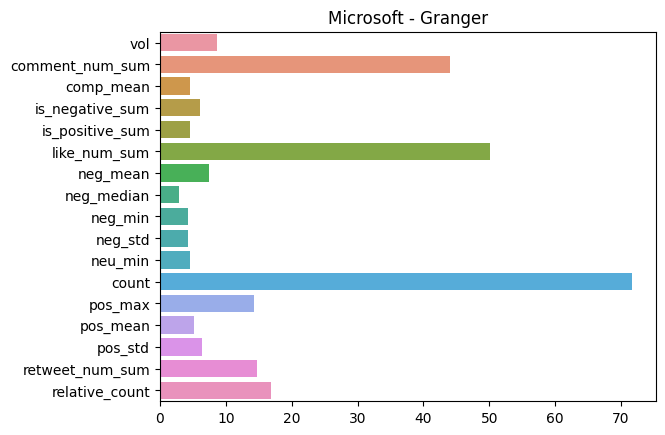

goog: [('vol', 5.58), ('comment_num_sum', 5.16), ('comp_mean', 2.95), ('is_negative_sum', 2.75), ('like_num_sum', 9.85), ('count', 20.85), ('pos_max', 5.89), ('retweet_num_sum', 5.51)]


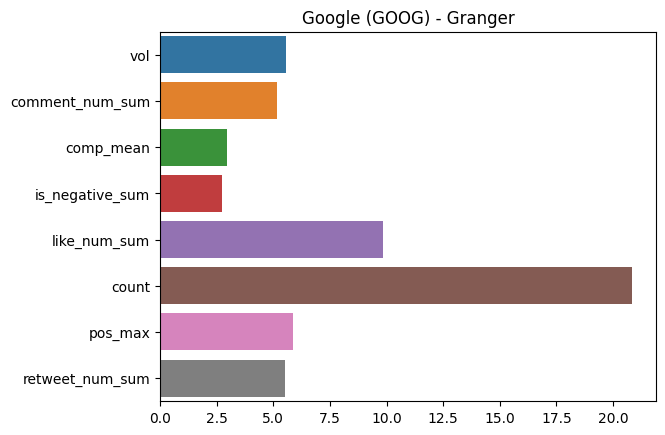

googl: [('high', 3.19), ('vol', 6.85), ('comment_num_sum', 6.07), ('is_negative_sum', 4.49), ('like_num_sum', 7.42), ('neg_mean', 7.38), ('neg_std', 5.07), ('neu_min', 6.7), ('count', 37.1), ('pos_max', 16.31), ('pos_mean', 2.84), ('pos_std', 6.68), ('retweet_num_sum', 24.53), ('relative_count', 9.4)]


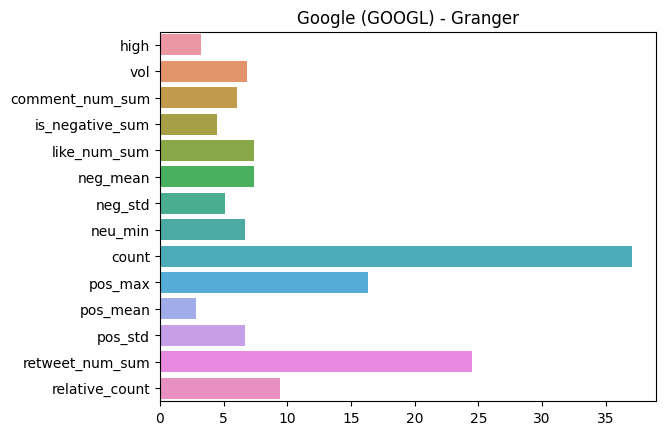

In [54]:
full_names = {
    "amzn": "Amazon",
    "aapl": "Apple",
    "msft": "Microsoft",
    "tsla": "Tesla",
    "goog": "Google (GOOG)",
    "googl": "Google (GOOGL)",
}

for company in ["amzn", "aapl", "tsla", "msft", "goog", "googl"]:
    df = pd.read_csv(f"../datasets/v3/binned/{company}.csv")

    vital_columns = ["post_date", "ticker", "close", "diffs", "bin_2", "bin_3", "bin_5"]
    cols = [i for i in df.columns if i not in vital_columns]

    relevant = granger_test(df, "diffs", cols)
    
    print(f"{company}: {relevant}")
    plot_F(relevant, f"{full_names[company]} - Granger")

In [32]:
grangercausalitytests(df[["close", "comp_mean"]], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.6627 , p=0.0006  , df_denom=8691, df_num=1
ssr based chi2 test:   chi2=11.6667 , p=0.0006  , df=1
likelihood ratio test: chi2=11.6589 , p=0.0006  , df=1
parameter F test:         F=11.6627 , p=0.0006  , df_denom=8691, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.1349  , p=0.0022  , df_denom=8688, df_num=2
ssr based chi2 test:   chi2=12.2768 , p=0.0022  , df=2
likelihood ratio test: chi2=12.2681 , p=0.0022  , df=2
parameter F test:         F=6.1349  , p=0.0022  , df_denom=8688, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.1546  , p=0.0060  , df_denom=8685, df_num=3
ssr based chi2 test:   chi2=12.4738 , p=0.0059  , df=3
likelihood ratio test: chi2=12.4649 , p=0.0059  , df=3
parameter F test:         F=4.1546  , p=0.0060  , df_denom=8685, df_num=3


{1: ({'ssr_ftest': (11.66268174446393, 0.0006405798382056005, 8691.0, 1),
   'ssr_chi2test': (11.66670752345753, 0.0006362851675333389, 1),
   'lrtest': (11.65888658840413, 0.000638965715072462, 1),
   'params_ftest': (11.662681744464269, 0.0006405798382050042, 8691.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (6.13486153279057, 0.0021754198590516463, 8688.0, 2),
   'ssr_chi2test': (12.276784370291994, 0.0021583911233064067, 2),
   'lrtest': (12.26812351206172, 0.0021677581500532815, 2),
   'params_ftest': (6.1348615327816605, 0.0021754198590719534, 8688.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (4.154596930143204, 0.005974875590852007, 8685.0, 3),
   'ssr_chi2test': (12.473836447946368, 0.005924332550528896, 3),
   'lrtest': (12.464894438511692, 0.005949025863742758, 3),
   'params_ftest': (4.154596930135641, 0.005974875590911624, 8685.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0.,

In [14]:
grangercausalitytests(df[["close", "comment_num_sum"]], maxlag=3, )


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0338  , p=0.1539  , df_denom=8691, df_num=1
ssr based chi2 test:   chi2=2.0345  , p=0.1538  , df=1
likelihood ratio test: chi2=2.0343  , p=0.1538  , df=1
parameter F test:         F=2.0338  , p=0.1539  , df_denom=8691, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3114  , p=0.2695  , df_denom=8688, df_num=2
ssr based chi2 test:   chi2=2.6242  , p=0.2693  , df=2
likelihood ratio test: chi2=2.6238  , p=0.2693  , df=2
parameter F test:         F=1.3114  , p=0.2695  , df_denom=8688, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2708  , p=0.2825  , df_denom=8685, df_num=3
ssr based chi2 test:   chi2=3.8154  , p=0.2821  , df=3
likelihood ratio test: chi2=3.8146  , p=0.2822  , df=3
parameter F test:         F=1.2708  , p=0.2825  , df_denom=8685, df_num=3


{1: ({'ssr_ftest': (2.033825408842553, 0.15386890025718689, 8691.0, 1),
   'ssr_chi2test': (2.034527454202871, 0.15376196525733507, 1),
   'lrtest': (2.034289436247491, 0.15378603849651842, 1),
   'params_ftest': (2.033825408845017, 0.15386890025675012, 8691.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.311355949452664, 0.2695077708215482, 8688.0, 2),
   'ssr_chi2test': (2.6242212865082895, 0.26925116307944696, 2),
   'lrtest': (2.623825269503868, 0.2693044823776297, 2),
   'params_ftest': (1.311355949453624, 0.2695077708215103, 8688.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.2707864100404427, 0.28252327251900494, 8685.0, 3),
   'ssr_chi2test': (3.815431943375312, 0.28209623236193165, 3),
   'lrtest': (3.814594779178151, 0.2821930710996554, 3),
   'params_ftest': (1.270786410042181, 0.28252327251835546, 8685.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 